In [21]:
# импортируем бибилиотеки
import pandas as pd
import pandahouse
from scipy import stats
import seaborn as sns

# T-тест между группами 0 и 3 по метрике линеаризованных лайков

In [2]:
# считываем нужные данные из clickhouse в датафрейм
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230820'
}

q = '''
SELECT
    exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes / views as ctr
FROM 
    {db}.feed_actions 
WHERE 
    toDate(time) BETWEEN '2023-07-30' AND '2023-08-05'
    AND exp_group IN (0, 3)
GROUP BY exp_group, user_id
'''

df1 = pandahouse.read_clickhouse(q, connection=connection)

#выводим заголовок датафрейма
print(df1.head())

   exp_group  user_id  likes  views       ctr
0          3   115383     12     44  0.272727
1          3   123580      2     11  0.181818
2          0     4944      8     41  0.195122
3          0     4504      5     15  0.333333
4          0   121508      6     25  0.240000


In [3]:
# считаем общий CTR в контрольной группе
ctr_control = df1[df1.exp_group == 0].likes.sum() / df1[df1.exp_group == 0].views.sum()

In [4]:
# добавляем в данные метрику линеаризованных лайков
df1['linearized_likes'] = df1.likes - ctr_control * df1.views

In [5]:
# t-тест по метрике линеаризованных лайков
stats.ttest_ind(df1[df1.exp_group == 0].linearized_likes,
                df1[df1.exp_group == 3].linearized_likes,
                equal_var=False)

Ttest_indResult(statistic=-16.186230032932844, pvalue=1.4918137745326139e-58)

In [6]:
# t-тест по обычному CTR
stats.ttest_ind(df1[df1.exp_group == 0].ctr,
                df1[df1.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-13.935320516755773, pvalue=6.216047483062228e-44)

<Axes: xlabel='linearized_likes', ylabel='Count'>

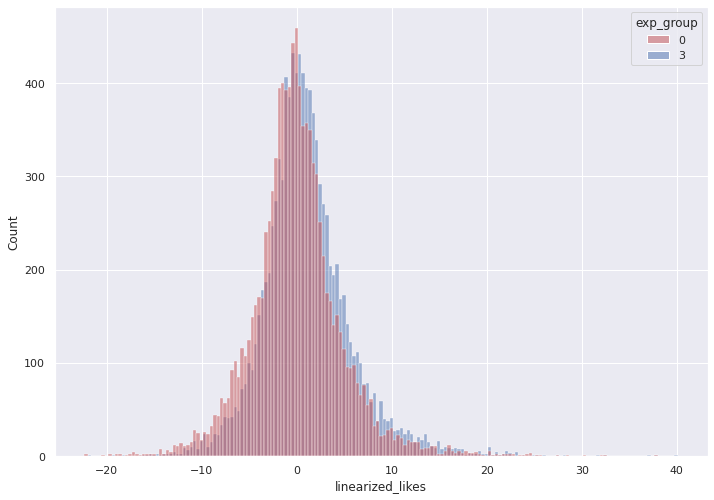

In [16]:
# увеличим размер графика
sns.set(rc={'figure.figsize':(11.7,8.27)})

# визуализация распределений по метрике линеаризованных лайков
sns.histplot(data=df1, x='linearized_likes', hue='exp_group', palette=['r', 'b'])

<Axes: xlabel='ctr', ylabel='Count'>

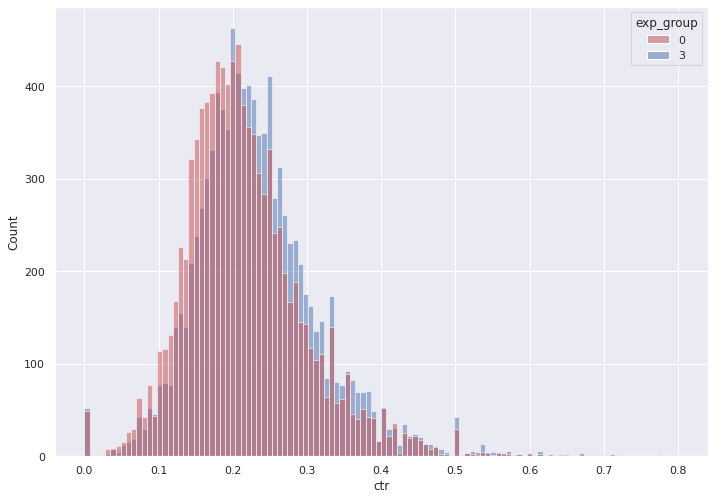

In [17]:
# визуализация распределений по обычному CTR
sns.histplot(data=df1, x='ctr', hue='exp_group', palette=['r', 'b'])

# T-тест между группами 1 и 2 по метрике линеаризованных лайков

In [9]:
# считываем нужные данные из clickhouse в датафрейм
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230820'
}

q = '''
SELECT
    exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes / views as ctr
FROM 
    {db}.feed_actions 
WHERE 
    toDate(time) BETWEEN '2023-07-30' AND '2023-08-05'
    AND exp_group IN (1, 2)
GROUP BY exp_group, user_id
'''

df2 = pandahouse.read_clickhouse(q, connection=connection)

#выводим заголовок датафрейма
print(df2.head())

   exp_group  user_id  likes  views       ctr
0          1   109963      3     15  0.200000
1          1    26117     32    141  0.226950
2          1   138232     18     73  0.246575
3          1    18392      7     32  0.218750
4          1    26295     39    141  0.276596


In [10]:
# считаем общий CTR в контрольной группе
ctr_control = df2[df2.exp_group == 1].likes.sum() / df2[df2.exp_group == 2].views.sum()

In [11]:
# добавляем в данные метрику линеаризованных лайков
df2['linearized_likes'] = df2.likes - ctr_control * df2.views

In [12]:
# t-тест по метрике линеаризованных лайков
stats.ttest_ind(df2[df2.exp_group == 1].linearized_likes,
                df2[df2.exp_group == 2].linearized_likes,
                equal_var=False)

Ttest_indResult(statistic=5.911547801865759, pvalue=3.4651949397662443e-09)

In [18]:
# t-тест по обычному CTR
stats.ttest_ind(df2[df2.exp_group == 1].ctr,
                df2[df2.exp_group == 2].ctr,
                equal_var=False)

Ttest_indResult(statistic=0.4051491913112757, pvalue=0.685373331140751)

<Axes: xlabel='linearized_likes', ylabel='Count'>

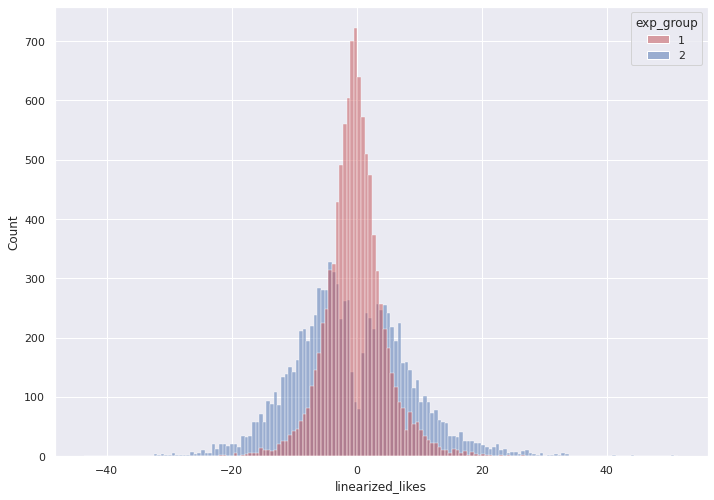

In [20]:
# визуализация распределений линеаризованных лайков
sns.histplot(data=df2, x='linearized_likes', hue='exp_group', palette=['r', 'b'])

<Axes: xlabel='ctr', ylabel='Count'>

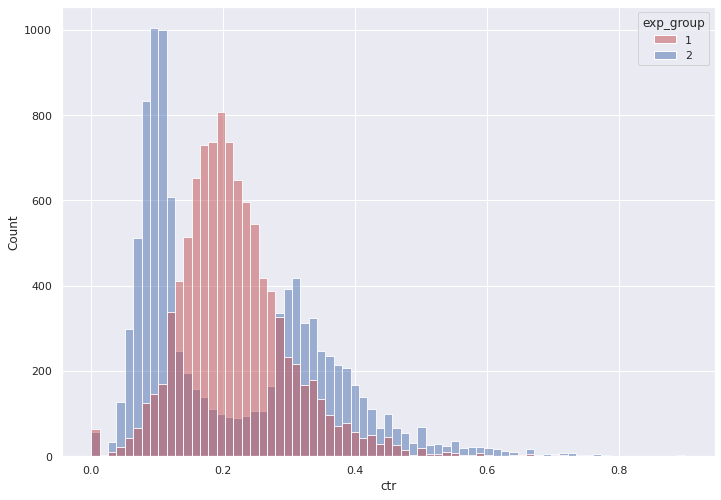

In [19]:
# визуализация распределений по обычному CTR
sns.histplot(data=df2, x='ctr', hue='exp_group', palette=['r', 'b'])

Различия видны, распределения стали симметричными относительно нуля и более сглаженными, pvalue стало меньше.